subnet resize

In [4]:
#install dependencies
# !pip install pandas
!pip install folium

   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 113.4/113.4 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/134.9 kB ? eta -:--:--
   ---------------------------------------- 134.9/134.9 kB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/90.4 kB ? eta -:--:--
   ---------------------------------------- 90.4/90.4 kB 5.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


step1-Read a dataset and print out the unique taxis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("D:/Research/Papers/repo/pythonforDS/data/taxi_data_merged.csv")

# Inspect
print(df.head())
print(df['taxiid'].nunique(), "unique taxis")

   taxiid            timestamp  longitude  latitude
0    6527  2008-02-02 13:36:14  116.49647  39.80149
1    6527  2008-02-02 13:39:30  116.48479  39.80049
2    6527  2008-02-02 13:44:32  116.48233  39.80023
3    6527  2008-02-02 13:46:17  116.48866  39.79760
4    6527  2008-02-02 13:54:35  116.49243  39.78182
499 unique taxis


Step 2: Plot All Taxi Locations (Scatter Plot)

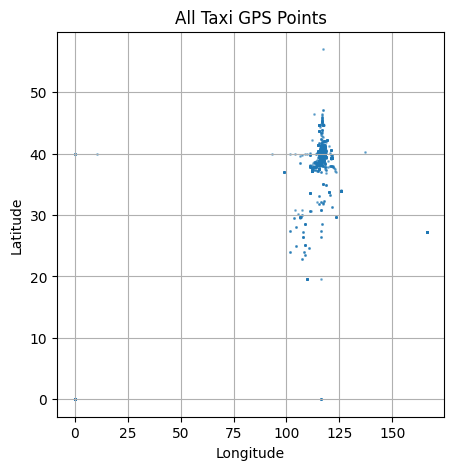

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(df['longitude'], df['latitude'], s=1, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("All Taxi GPS Points")
plt.grid(True)
plt.show()

Step3-Plot All GPS Points on a Map

In [14]:
import pandas as pd
import folium
from IPython.display import display

# Load your taxi data
# df = pd.read_csv("taxi_data_merged.csv")

# Downsample if needed
df_sample = df.sample(n=10000)  # Or skip this line to use all points

# Create map centered on average location
m = folium.Map(location=[df_sample['latitude'].mean(), df_sample['longitude'].mean()],
               zoom_start=12, tiles='CartoDB positron')
# Collect all coordinates to define bounds
bounds = []
# min_lat, max_lat = df_sample['latitude'].min(), df_sample['latitude'].max()
# min_lon, max_lon = df_sample['longitude'].min(), df_sample['longitude'].max()

# Add GPS points as circle markers
for _, row in df_sample.iterrows():
    lat = row['latitude'],
    lon = row['longitude'],
    bounds.append([lat, lon]) # Collect for fit_bounds()
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],

        width=600,
        height=400,
        radius=1,
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(m)
# Zoom to fit all the plotted points
m.fit_bounds(bounds)

# 👉 Display map inline in Jupyter Notebook
display(m)
